In [1]:
import sys
sys.path.insert(0,'../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from twiss import twiss_from_bmadx_particles

# Run each element'

In [4]:
from bmadx import Particle, M_ELECTRON

coords = np.ones(6)*1e-3
s = 0.0
p0c = 4e7
p = Particle(*coords, s, p0c, M_ELECTRON)
# Particle is a named tuple with: cannonical coords (x, px, y, py, z, pz), s, p0c, mc2:
p

Particle(x=0.001, px=0.001, y=0.001, py=0.001, z=0.001, pz=0.001, s=0.0, p0c=40000000.0, mc2=510998.94999999995)

In [5]:
p.x

0.001

In [6]:
# Create particle beam
n_particles = 10_000 # number of particles in beam
coords = np.random.multivariate_normal(mean = np.zeros(6),
                                       cov = 1e-6*np.identity(6),
                                       size = n_particles
                                      )
beam = Particle(*coords.T, s, p0c, M_ELECTRON)
beam

Particle(x=array([ 1.59720099e-03, -3.03292591e-05,  1.00775559e-03, ...,
        8.87461970e-05,  7.15770757e-04,  1.10062822e-03]), px=array([ 0.00051152,  0.00075348,  0.00140785, ...,  0.00062597,
       -0.00163018, -0.00092975]), y=array([ 0.00024601,  0.00078812, -0.00027757, ...,  0.00058857,
       -0.00214313,  0.00095517]), py=array([-0.00093862, -0.00052721, -0.00035101, ..., -0.00061451,
       -0.00187383, -0.00230237]), z=array([ 0.00036695, -0.0005484 ,  0.00139066, ..., -0.00061582,
        0.00079769, -0.00034668]), pz=array([ 0.00069881,  0.00031798, -0.0014666 , ..., -0.00045924,
        0.00047633, -0.00027085]), s=0.0, p0c=40000000.0, mc2=510998.94999999995)

In [9]:
from bmadx.pmd_utils import openpmd_to_bmadx_particles, bmadx_particles_to_openpmd
tm = bmadx_particles_to_openpmd(beam)

In [11]:
tm.weight = np.abs(tm.weight)

In [12]:
tm.weight

array([1.60217663e-19, 1.60217663e-19, 1.60217663e-19, ...,
       1.60217663e-19, 1.60217663e-19, 1.60217663e-19])

In [7]:
twiss_from_bmadx_particles(beam)

{'alpha_x': 0.0011285677587667704,
 'beta_x': 1.009029477013094,
 'gamma_x': 0.991052587111099,
 'emit_x': 1.023674280562815e-06,
 'eta_x': 0.006086348134466045,
 'etap_x': 0.002759048824527106,
 'norm_emit_x': 8.013122379705987e-05,
 'alpha_y': -0.0007199051804452672,
 'beta_y': 1.0016550868070808,
 'gamma_y': 0.9983481653860651,
 'emit_y': 1.0087061588040834e-06,
 'eta_y': 0.0021248256458361427,
 'etap_y': 0.00017954051697158477,
 'norm_emit_y': 7.895954845340356e-05}

Text(0, 0.5, '$y$ (mm)')

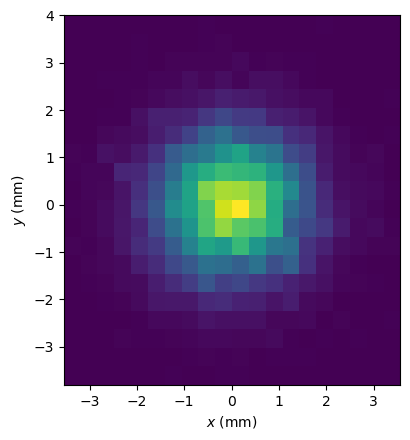

In [8]:
# plot beam x,y histogram:
fig, ax = plt.subplots()
ax.hist2d(beam.x*1e3, beam.y*1e3, bins=(20,20))
ax.set_aspect('equal')
ax.set_xlabel(r'$x$ (mm)')
ax.set_ylabel(r'$y$ (mm)')

In [41]:
# Create a drift element: 
from bmadx import Drift

d = Drift(L=1.0)
# Drift is a named tuple with: L (drift length): 
d

Drift(L=1.0)

In [43]:
# Track though drift
from bmadx import track_element

track_element(beam, d) # returns outgoing particle beam

Particle(x=array([ 0.00052969, -0.00045977,  0.00017756, ...,  0.00246988,
        0.00129232,  0.0019936 ]), px=array([0.00079766, 0.00020332, 0.00018365, ..., 0.00032862, 0.00072337,
       0.00056225]), y=array([ 2.74834425e-03,  9.66995343e-05, -1.44207758e-03, ...,
        3.21848216e-04, -3.82698919e-03, -1.57101791e-03]), py=array([ 1.97455411e-03, -8.21937448e-05, -6.39492958e-04, ...,
        7.80770056e-04, -1.25933440e-03, -1.36045951e-03]), z=array([-1.75412891e-04, -8.77311485e-04,  8.66488904e-04, ...,
       -1.56254782e-05, -3.73855290e-04,  1.61780505e-03]), pz=array([-3.24909874e-04, -1.63111608e-04, -7.89551654e-04, ...,
       -9.42366670e-04, -4.28653427e-05, -7.56092225e-04]), s=1.0, p0c=40000000.0, mc2=510998.94999999995)

In [18]:
# Create a quarupole element:
from bmadx import Quadrupole

q_focus = Quadrupole(L=0.1, K1=10.0)
# Quadrupole is a named tuple with: L, K1, X_OFFSET=0, Y_OFFSET=0, TILT=0
q_focus

Quadrupole(L=0.1, K1=10.0, NUM_STEPS=1, X_OFFSET=0.0, Y_OFFSET=0.0, TILT=0.0)

In [19]:
# Track though quadrupole
track_element(beam, q_focus)

Particle(x=array([-0.00259119, -0.0016026 , -0.00079104, ...,  0.00089325,
       -0.000334  , -0.0012257 ]), px=array([-0.00030865,  0.00117261, -0.00043574, ..., -0.00180316,
        0.00120677,  0.00206227]), y=array([-7.82075360e-04,  1.58874634e-03, -8.95781415e-04, ...,
        7.55083532e-05,  9.08699848e-04, -1.25628564e-03]), py=array([ 4.74655088e-07,  1.48967325e-03, -1.76839991e-03, ...,
       -2.35547389e-04,  1.47205100e-03, -1.07336073e-06]), z=array([ 4.71127335e-04, -7.05366868e-04, -5.31875170e-05, ...,
        9.63343976e-04, -1.47590429e-03,  1.83412354e-03]), pz=array([-0.00117989, -0.0009062 , -0.0012963 , ..., -0.00030126,
        0.00043758, -0.00052161]), s=0.1, p0c=40000000.0, mc2=510998.94999999995)

In [22]:
# Create a Sbend element:
from bmadx import SBend

D1 = SBend(L = 1, P0C = p0c, G = 1.0, E1 = 0.1, E2 = 0.1)

In [23]:
track_element(beam, D1)

Particle(x=array([-0.00445067, -0.00182855, -0.00204222, ..., -0.00020121,
        0.00061689, -0.00046022]), px=array([-1.06425291e-03,  9.43232565e-05, -1.38268131e-03, ...,
       -1.53325861e-03,  1.21526393e-03,  9.98435634e-04]), y=array([ 5.43535545e-05,  1.31472858e-03, -1.63140958e-03, ...,
       -2.31550404e-04,  1.34624905e-03,  8.84573373e-05]), py=array([ 0.00087267, -0.00033469, -0.00070683, ..., -0.00031133,
        0.00040649,  0.00139973]), z=array([ 0.00411884,  0.00110453,  0.0013284 , ...,  0.0004839 ,
       -0.00153468,  0.00278305]), pz=array([-0.00117989, -0.0009062 , -0.0012963 , ..., -0.00030126,
        0.00043758, -0.00052161]), s=1.0, p0c=array(40000000.), mc2=510998.94999999995)

In [25]:
# Create a Sextupole element:
from bmadx import Sextupole
S1 = Sextupole(L = 1, K2 = 1 )


In [26]:
track_element(beam, S1)

Particle(x=array([-0.00527366, -0.00210008, -0.00190086, ...,  0.00019104,
        0.00038242, -0.00061321]), px=array([-0.00284412, -0.00046178, -0.00119197, ..., -0.00083581,
        0.00081872,  0.00075453]), y=array([-2.59119216e-05,  1.46678484e-03, -1.70783513e-03, ...,
       -2.20927239e-04,  1.42721241e-03, -4.33370563e-05]), py=array([ 7.97690076e-04, -5.30224058e-05, -9.46330275e-04, ...,
       -3.24094332e-04,  6.21971319e-04,  1.27801803e-03]), z=array([ 4.71117524e-04, -7.05447128e-04, -5.32484021e-05, ...,
        9.63396063e-04, -1.47573047e-03,  1.83418180e-03]), pz=array([-0.00117989, -0.0009062 , -0.0012963 , ..., -0.00030126,
        0.00043758, -0.00052161]), s=1.0, p0c=40000000.0, mc2=510998.94999999995)

## Compare with R_gen6

In [23]:
from bmadx import Particle, M_ELECTRON

coords = np.ones(6)*1e-3
s = 0.0
p0c = 4e7
p = Particle(*coords, s, p0c, M_ELECTRON)
# Particle is a named tuple with: cannonical coords (x, px, y, py, z, pz), s, p0c, mc2:
p

Particle(x=0.001, px=0.001, y=0.001, py=0.001, z=0.001, pz=0.001, s=0.0, p0c=40000000.0, mc2=510998.94999999995)

### Drift

In [24]:
# Create a drift element: 
from bmadx import Drift

d = Drift(L=1.0)
# Drift is a named tuple with: L (drift length): 
d

Drift(L=1.0)

In [25]:
from r_gen6 import *
r6 = r_gen6(L = 1.0, angle = 0)

In [26]:
# Track with bmadx
# Track though drift
from bmadx import track_element

track_element(p, d) # returns outgoing particle beam

Particle(x=0.0019990019960084817, px=0.001, y=0.0019990019960084817, py=0.001, z=0.000999164924440183, pz=0.001, s=1.0, p0c=40000000.0, mc2=510998.94999999995)

In [27]:
# Track with r_gen6
np.matmul(r6, coords)

array([0.002, 0.001, 0.002, 0.001, 0.001, 0.001])

### Dipole

In [32]:
# Create a Sbend element:
from bmadx import SBend

D1 = SBend(L = 0.1, P0C = p0c, G = 0.5, E1 = 0.0, E2 = 0.1)
track_element(p, D1)

Particle(x=0.001101157687964056, px=0.0010789320635333618, y=0.0010999526674531663, py=0.000944818304900785, z=0.0009473961722735597, pz=0.0009999999999998899, s=0.1, p0c=array(40000000.), mc2=510998.94999999995)

In [33]:
r6 = r_gen6(L = 0.1 , angle = 0.1*0.5, E1 = 0.0, E2 = 0.1)
np.matmul(r6, coords)

array([0.00110121, 0.00107898, 0.0011    , 0.00094482, 0.00094748,
       0.001     ])

### Quad

In [70]:
# Create a quarupole element:
from bmadx import Quadrupole

q_focus = Quadrupole(L=0.1, K1=10.0)
track_element(p,q_focus)

Particle(x=0.0010487094525905673, px=-3.296855035329286e-05, y=0.00115193903813484, py=0.0020671006533949897, z=0.000999879829429573, pz=0.001, s=0.1, p0c=40000000.0, mc2=510998.94999999995)

In [71]:
r6 = r_gen6(L = 0.1, angle = 0, k1 = 10.0)
np.matmul(r6, coords)

array([ 1.04875693e-03, -3.30011883e-05,  1.15209308e-03,  2.06716826e-03,
        1.00000000e-03,  1.00000000e-03])

# Test BmadX Particle group conversion

In [25]:
from bmadx import Particle, M_ELECTRON
# Create particle beam
n_particles = int(1e5) # number of particles in beam
coords = np.random.multivariate_normal(mean = np.zeros(6),
                                       cov = 1e-6*np.identity(6),
                                       size = n_particles
                                      )
beam = Particle(*coords.T, 0, 4e7, M_ELECTRON)
beam

Particle(x=array([-0.00059626, -0.0022432 , -0.00045367, ..., -0.00075867,
        0.00048642,  0.00055149]), px=array([-0.00078184,  0.00016927,  0.00030361, ...,  0.00215233,
       -0.00049908,  0.00120649]), y=array([ 0.00012427,  0.0016162 , -0.00087935, ...,  0.00057561,
       -0.00023516,  0.00097275]), py=array([-2.61102595e-04, -4.13257501e-05,  2.56259709e-04, ...,
       -5.21849224e-04, -1.04041191e-04, -7.84721022e-04]), z=array([-0.00110426,  0.00280764,  0.00137861, ...,  0.00133754,
        0.00173114, -0.00072544]), pz=array([-1.12463512e-03,  1.43552140e-04, -1.21562319e-03, ...,
        9.71773316e-04, -3.28865843e-05, -1.42678143e-03]), s=0, p0c=40000000.0, mc2=510998.94999999995)

In [27]:
setattr(beam, 'x', np.ones(len(beam.x)))

AttributeError: can't set attribute

In [8]:
from bmadx.pmd_utils import openpmd_to_bmadx_particles, bmadx_particles_to_openpmd

In [9]:
ptest = bmadx_particles_to_openpmd(beam)

In [17]:
ptest.xp

array([-0.0002299 ,  0.00050372,  0.0008349 , ...,  0.00047659,
       -0.00032401, -0.00100981])

In [12]:
beam.x

NameError: name 'beam' is not defined

In [11]:
ptest.twiss('xy')

{'alpha_x': -0.0018154468377618474,
 'beta_x': 1.003518835680214,
 'gamma_x': 0.9964967873965114,
 'emit_x': 1.0063929959311547e-06,
 'eta_x': 0.0034107951841475183,
 'etap_x': 0.0005750798528333609,
 'norm_emit_x': 7.877834315381641e-05,
 'alpha_y': -0.0011741907613073703,
 'beta_y': 0.9964030232049694,
 'gamma_y': 1.0036113454447382,
 'emit_y': 9.98890777660699e-07,
 'eta_y': 0.0018205579308965853,
 'etap_y': 0.003115699594614204,
 'norm_emit_y': 7.819108516641562e-05}

In [22]:
ptest['mean_energy']

40003195.11152757

In [86]:
import scipy
scipy.constants.e

1.602176634e-19

In [14]:
ptest.gamma

array([78.36695172, 78.28237568, 78.20619374, ..., 78.34143638,
       78.28744741, 78.29685789])

In [3]:
dic = {'a': 1, 'b': {'b1':2, 'b2': 3}}
dic2  = {'a': 1, 'b': 2}

In [2]:
import h5py
with h5py.File('test2.h5', 'a') as hf:
    for key, value in dic2.items():
        hf.create_dataset(name = key, data = value)

In [3]:
with h5py.File('test2.h5', 'r') as hf:
    print(hf.keys())

<KeysViewHDF5 ['a', 'b']>


In [5]:
from tools import dict2hdf5

In [7]:
import h5py
with h5py.File('test4.h5', 'a') as hf:
    dict2hdf5(hf, dic)

In [11]:
with h5py.File('test4.h5', 'r') as hf:
    print(np.array(hf['b']['b1']))

2


In [16]:
from distgen import Generator
gen = Generator(r'C:\Users\yingb\Desktop\pyDFCSR\pyDFCSR_2D\example\input\dipole_init_beam.yaml')
gen.run()
pg = gen.particles

In [19]:
pg.t

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
pg.write('test3.h5')

In [24]:
with h5py.File('test3.h5', 'a') as hf:
    hf.attrs['test'] = 3

In [ ]:
with h5py.File('test3.h5', 'r') as hf:
    print()